<a href="https://colab.research.google.com/github/chizuchizu/IOAI/blob/main/HOME_SUB/JPN_ML_SUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Save the Factory: Feature Engineering Challenge

<img src="https://drive.google.com/uc?id=1QjV8Th9fOK89MhgV-Y1Irn7dTl7ZheP0" width="650">

## Background

In the whimsical town of Widgetville, the mighty Widget Corp stands as the centerpiece, crafting widgets of unmatched quality with a **Ruby** and **Sapphire** magic stones inside. But recently, a trickster sprite seems to have infiltrated the assembly lines, introducing problems and faults to widgets's working procedure and labels. As the company’s freshly appointed Chief Engineering Detective, you are tasked with a mission to unravel this puzzling situation.

## Task

- Your ultimate goal is to effectively classify widgets into two classes: **Ruby** and **Sapphire**.

- You have recovered the labels for a previous month's supply of widgets, and should use these to classify the remaining widgets.

- For every widget, you have an access to the so-called "The Pulse of the Machine" -- a unique numerical representation of each widget, which features 8 magic threads (represented by 187 numbers) woven into the central timeless crystal.
Therefore, each widget is described by (187 x 8) array. You must use these data to recover the **Ruby** and **Sapphire** labels.

- You need to engineer discerning features from the **Pulse of the Machine**, since efficient factory procedures allow you to **only use Decision Tree Classifier** with a limited tree depth as a model, with no hyperparameters change allowed.
  - You can read more about Decision Trees in scikit-learn documentation:
    - https://en.wikipedia.org/wiki/Decision_tree
    - https://scikit-learn.org/stable/modules/tree.html
    - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
  
- You have two levels of difficulty, producing **Efficient** and **Super Duper Efficient** solutions. These vary by the allowed tree depth.

- Your classification success will be measured by the ROC AUC metric
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

- Your solution for each task should not exceed 5 minutes for training from scratch **AND** inference on the validation/test set on the standard Colab non-GPU instance. This **INCLUDES** features generation (working time of the function that transforms initial Pulse of the Machine into a set of features for the model).

## Deliverables

- We will share the test data 48 hours before the deadline

- Use test data to create `efficient_test_predictions.txt` and `super_duper_efficient_test_predictions.txt` and share these files with us

- Also share this notebook containing your solution so we can reproduce your results and check the time constraints

## Tips
- Aim to create a minimal yet mighty set of derivative features to maintain the elegance and effectiveness of your tools.
- The crystals are indeed **timeless** -- be aware that there are no time series involved.
- There was a rumor that not only labels, but the data itself was corrupted by evil spirits. Is there a way for a possible recovery?
- Ensure your solutions are as clear as the crystal waters of Widgetville’s famed springs by providing them with sufficient documentation.

# Below goes data loading and visualization

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(2024)
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
!gdown 1eIrRyAqckN6zCjPb9VS-2rw7Bup7YhsA

Downloading...
From (original): https://drive.google.com/uc?id=1eIrRyAqckN6zCjPb9VS-2rw7Bup7YhsA
From (redirected): https://drive.google.com/uc?id=1eIrRyAqckN6zCjPb9VS-2rw7Bup7YhsA&confirm=t&uuid=992da310-2dc7-45cb-983a-17ceeea4cad7
To: /content/FE_hometask_data_v3.pickle
100% 260M/260M [00:03<00:00, 86.8MB/s]


In [ ]:
data = pd.read_pickle('FE_hometask_data_v3.pickle')
for key in data.keys():
  print(key)

train
val


In [ ]:
X_train = np.array([x[0] for x in data['train'].values()])
y_train = np.array([x[1] for x in data['train'].values()])

X_val = np.array([x[0] for x in data['val'].values()])
y_val = np.array([x[1] for x in data['val'].values()])
# this is temporary as we'll share the test data later
X_test = X_val

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((20240, 187, 8), (20240,), (1456, 187, 8), (1456,), (1456, 187, 8))

In [ ]:
def vis(arr, color='r'):
  widget_type = 'Ruby' if color == 'r' else 'Sapphire'
  plt.figure(figsize=(12, 8))
  for cnt in range(8):
    plt.plot(arr[:, cnt], color=color, alpha=.2 + .1*cnt)
  plt.grid()
  plt.title(f'Pulse of the Machine for {widget_type}')

In [ ]:
y_train[0], y_train[2]

(True, False)

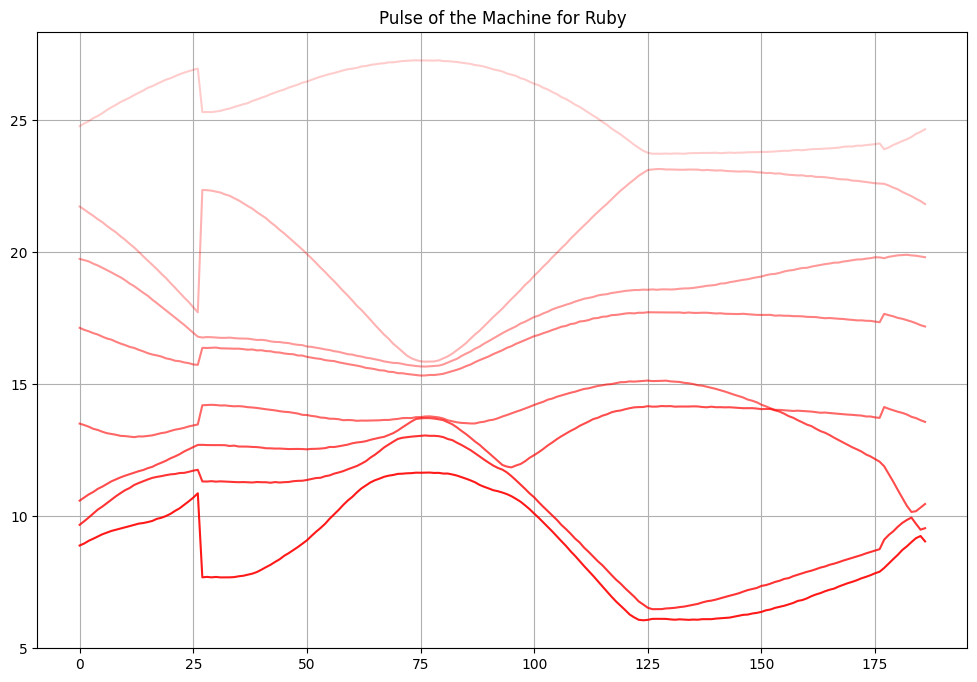

In [ ]:
vis(X_train[0], 'r')

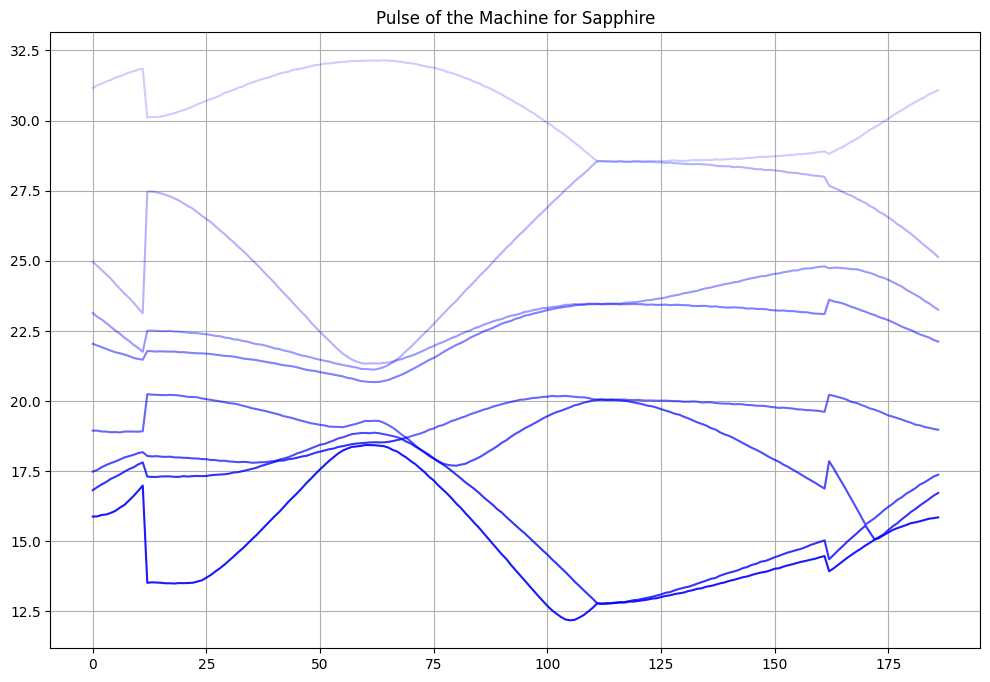

In [ ]:
vis(X_train[2], 'b')

# Functions to evaluate the results
N.B. Do not change it!

In [ ]:
def efficient_eval(train_features, val_features, y_train=y_train):
  model = DecisionTreeClassifier(max_depth=20, random_state=2024).fit(train_features, y_train)
  preds = model.predict(val_features)
  return roc_auc_score(y_val, preds)

def super_duper_efficient_eval(train_features, val_features, y_train=y_train):
  model = DecisionTreeClassifier(max_depth=4, random_state=2024).fit(train_features, y_train)
  preds = model.predict(val_features)
  return roc_auc_score(y_val, preds)

# Functions to write answers to files

Don't change the functions, share the files with us in your final submission.

In [ ]:
def efficient_test_predictions(train_features, test_features, y_train=y_train):
  model = DecisionTreeClassifier(max_depth=20, random_state=2024).fit(train_features, y_train)
  preds = ['1' if x else '0'
           for x in model.predict(test_features)]
  with open('efficient_test_predictions.txt', 'w') as f:
    f.write(''.join(preds))

def super_duper_efficient_test_predictions(train_features, test_features, y_train=y_train):
  model = DecisionTreeClassifier(max_depth=4, random_state=2024).fit(train_features, y_train)
  preds = ['1' if x else '0'
           for x in model.predict(test_features)]
  with open('super_duper_efficient_test_predictions.txt', 'w') as f:
    f.write(''.join(preds))

# our feature engineering functions

In [ ]:
from scipy.fft import fft
import matplotlib.pyplot as plt
import scipy.stats
import scipy
from scipy.signal import stft

In [ ]:
def min_max_normalization_in_eight_wave(a,axis=None):
    a_min, a_max = a.min(), a.max()
    return (a-a_min)/(a_max-a_min)

In [ ]:
def min_max_normalization_special(a,axis=None):
    a_min, a_max = a[7], a[1]
    return (a-a_min)/(a_max-a_min)

In [ ]:
def special_normalization(X):
    X_without_noise = np.apply_along_axis(min_max_normalization_special, 2, X)
    return X_without_noise

In [ ]:
def extract_features_for_each_wave(arr):
    max_idx = np.argmax(arr)
    min_idx = np.argmin(arr)
    max_val = arr[max_idx]
    min_val = arr[min_idx]
    return np.array([max_val, min_val, max_idx, min_idx])

In [ ]:
def extract_fft_features(X, visualize = False):
    X_fft = np.abs(fft(X))
    if visualize :
       print(f"X_fft shape : {X_fft.shape}")
       plt.subplot(2, 1, 1)
       plt.plot(t, X_fft[0])
       plt.title('after fft')
       plt.xlabel('Time [s]')
       plt.ylabel('Amplitude')
       plt.show()

    X_stft_feature = np.apply_along_axis(extract_features_for_each_wave, 1, X_fft)
    return X_stft_feature, X_fft

In [ ]:
def extract_stft_features(X, visualize = False):
     X_stft = np.zeros([X.shape[0],94,X.shape[2]])

     for i in range(X.shape[0]) :
        for j in range(X.shape[2]) :
            f, t, Zxx = stft(X[i,:,j])
            X_stft[i,:,j] = f

     if visualize :
        print(f"X_fft shape : {X_stft.shape}")
        plt.subplot(2, 1, 1)
        plt.plot(t, X_stft[0])
        plt.title('after fft')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.show()

     X_fft_feature = np.apply_along_axis(extract_features_for_each_wave, 1, X_stft)
     return X_fft_feature, X_stft

In [ ]:
def extract_savgol_features(X, deriv):
    X_savgol = scipy.signal.savgol_filter(X, 5,2,deriv=deriv, axis=-1)
    savgol_features = np.apply_along_axis(extract_features_for_each_wave, 1, X_savgol)
    return savgol_features, X_savgol

In [ ]:
def count_threshold_crossings_normal(arr):
    thresholds = np.arange(0.2,1.0,0.1)
    crossings = np.zeros(thresholds.shape)
    overs = np.zeros(thresholds.shape)
    sums = np.zeros(thresholds.shape)
    for i, threshold in enumerate(thresholds):
        binary_arr = arr > threshold
        crossings[i] = np.sum(binary_arr[:-1] != binary_arr[1:])
        overs[i] = np.sum(binary_arr)
        sums[i] = (arr*binary_arr).sum() - threshold*(binary_arr.sum())


    return np.concatenate([crossings, overs,sums])

In [ ]:
def count_threshold_crossings_super(arr):
    thresholds = np.arange(0.5,0.9,0.1)
    crossings = np.zeros(thresholds.shape)
    overs = np.zeros(thresholds.shape)
    sums = np.zeros(thresholds.shape)
    for i, threshold in enumerate(thresholds):
        binary_arr = arr > threshold
        crossings[i] = np.sum(binary_arr[:-1] != binary_arr[1:])
        overs[i] = np.sum(binary_arr)
        sums[i] = (arr*binary_arr).sum() - threshold*(binary_arr.sum())


    return np.concatenate([crossings, overs,sums])

In [ ]:
def get_feature_train_normal(X):

    simple_feature_before_normalize = np.apply_along_axis(extract_features_for_each_wave, 1, X)

    X_normalized = np.array([min_max_normalization_in_eight_wave(x) for x in X])

    savgol_features_A, X_savgol_first_A  = extract_savgol_features(X_normalized, 0)
    savgol_features_B, X_savgol_first_B  = extract_savgol_features(X_normalized, 1)
    savgol_features_C, X_savgol_first_C  = extract_savgol_features(X_normalized, 2)

    threshold_crossings = np.apply_along_axis(count_threshold_crossings_normal, 1, X_normalized)

    X_fft_feature, X_fft = extract_fft_features(X_normalized)
    X_stft_feature, X_stft = extract_stft_features(X_normalized)

    Y = np.concatenate([simple_feature_before_normalize, savgol_features_A,savgol_features_B,savgol_features_C, threshold_crossings, X_fft_feature, X_stft_feature],axis=1)
    return Y.reshape((Y.shape[0],-1))

In [ ]:
def get_feature_train_super(X):

    simple_feature_before_normalize = np.apply_along_axis(extract_features_for_each_wave, 1, X)

    X_special_normalized = special_normalization(X)
    simple_feature_special_normalized = np.apply_along_axis(extract_features_for_each_wave, 1, X_special_normalized)

    X_normalized = np.array([min_max_normalization_in_eight_wave(x) for x in X])

    savgol_features_A, X_savgol_first_A  = extract_savgol_features(X_normalized, 0)
    savgol_features_B, X_savgol_first_B  = extract_savgol_features(X_normalized, 1)
    savgol_features_C, X_savgol_first_C  = extract_savgol_features(X_normalized, 2)

    savgol_features_D, X_savgol_first_D  = extract_savgol_features(X_special_normalized, 0)
    savgol_features_E, X_savgol_first_E  = extract_savgol_features(X_special_normalized, 1)
    savgol_features_F, X_savgol_first_F  = extract_savgol_features(X_special_normalized, 2)

    threshold_crossings = np.apply_along_axis(count_threshold_crossings_normal, 1, X_normalized)
    threshold_crossings_special_normalized = np.apply_along_axis(count_threshold_crossings_normal, 1, X_special_normalized)

    X_fft_feature, X_fft = extract_fft_features(X_normalized)
    X_stft_feature, X_stft = extract_stft_features(X_normalized)

    X_fft_special_feature, X_fft_special = extract_fft_features(X_special_normalized)
    X_stft_special_feature, X_stft_special = extract_stft_features(X_special_normalized)


    Y = np.concatenate([simple_feature_before_normalize, simple_feature_special_normalized, savgol_features_A,savgol_features_B,savgol_features_C, savgol_features_D, savgol_features_E, savgol_features_F, threshold_crossings, threshold_crossings_special_normalized, X_fft_feature, X_stft_feature, X_fft_special_feature, X_stft_special_feature ],axis=1)
    return Y.reshape((Y.shape[0],-1))

# UPDATE: the test data!

- Generate test predictions using your functions
- Download your files (use `Files` icon on the left sidebar)
- Upload them somewhere and share the link
- Don't forget to share this notebook as well!

In [ ]:
!gdown 1LmNuET1iDOIS23MTzG-7B99Pfrpwaxhd

Downloading...
From: https://drive.google.com/uc?id=1LmNuET1iDOIS23MTzG-7B99Pfrpwaxhd
To: /content/FE_hometask_data_v3_test.pickle
100% 24.3M/24.3M [00:00<00:00, 61.2MB/s]


In [ ]:
test_data = pd.read_pickle('FE_hometask_data_v3_test.pickle')
X_test = np.array([x[0] for x in test_data['test'].values()])
X_test.shape

(2024, 187, 8)

In [ ]:
# your solution! replace it
our_feature_set_for_efficient = get_feature_train_normal
our_feature_set_for_super_efficient = get_feature_train_super
%time efficient_test_predictions(our_feature_set_for_efficient(X_train), our_feature_set_for_efficient(X_test))
%time super_duper_efficient_test_predictions(our_feature_set_for_super_efficient(X_train),our_feature_set_for_super_efficient(X_test))

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1240: UserWarning: nperseg = 256 is greater than input length  = 187, using nperseg = 187
  freqs, time, Zxx = _spectral_helper(x, x, fs, window, nperseg, noverlap,


CPU times: user 1min 44s, sys: 6.16 s, total: 1min 50s
Wall time: 1min 52s


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1240: UserWarning: nperseg = 256 is greater than input length  = 187, using nperseg = 187
  freqs, time, Zxx = _spectral_helper(x, x, fs, window, nperseg, noverlap,


CPU times: user 3min 35s, sys: 11.6 s, total: 3min 47s
Wall time: 3min 44s
